In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 7.5]

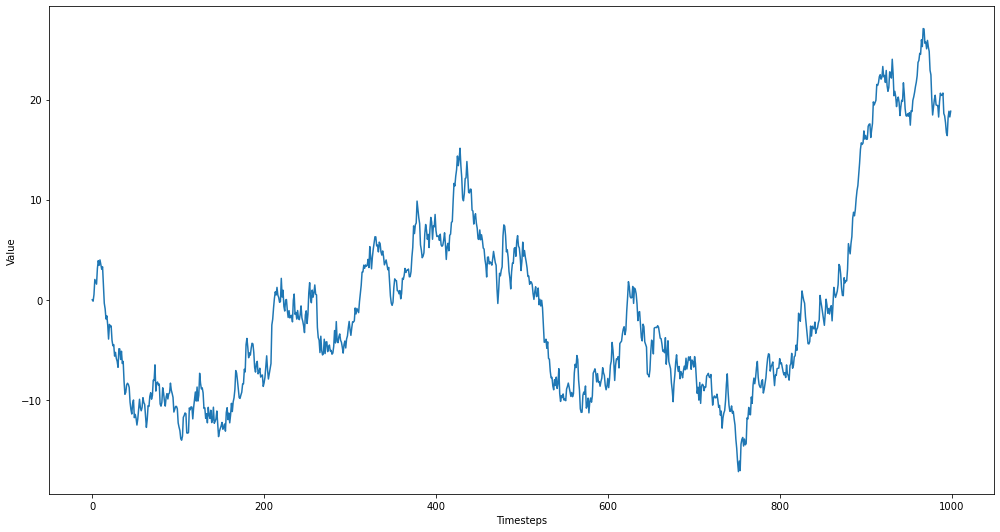

In [1]:
np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0] = 0

random_walk = np.cumsum(steps)

fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")

plt.tight_layout()

In [2]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.9659524876918759
p-value: 0.7654789696692579


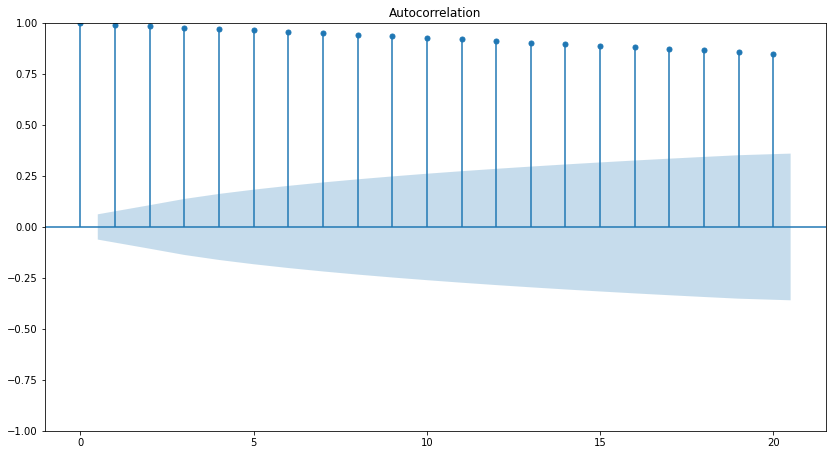

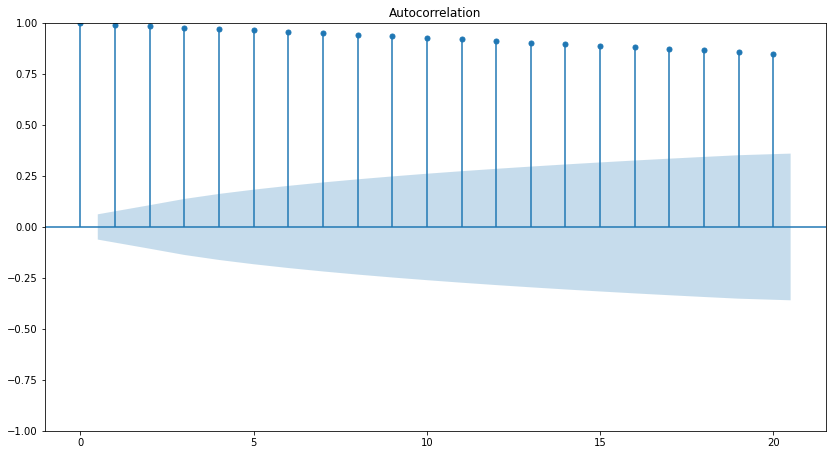

In [3]:
plot_acf(random_walk, lags=20)

ADF Statistic -31.7893108575606
p-value: 0.0


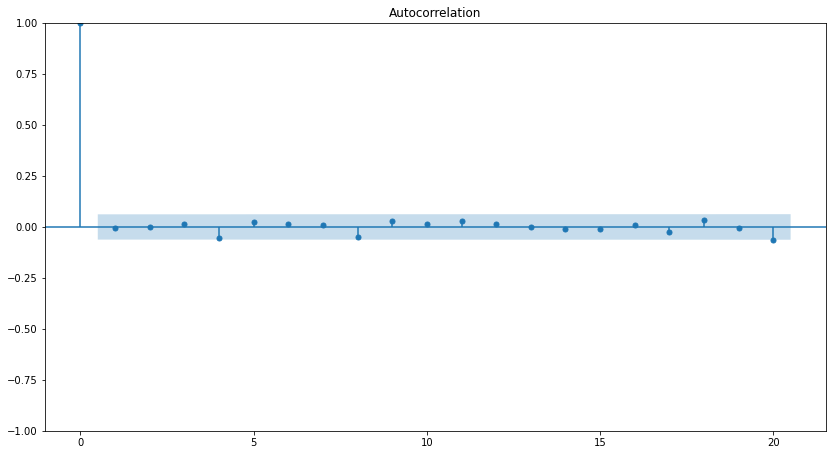

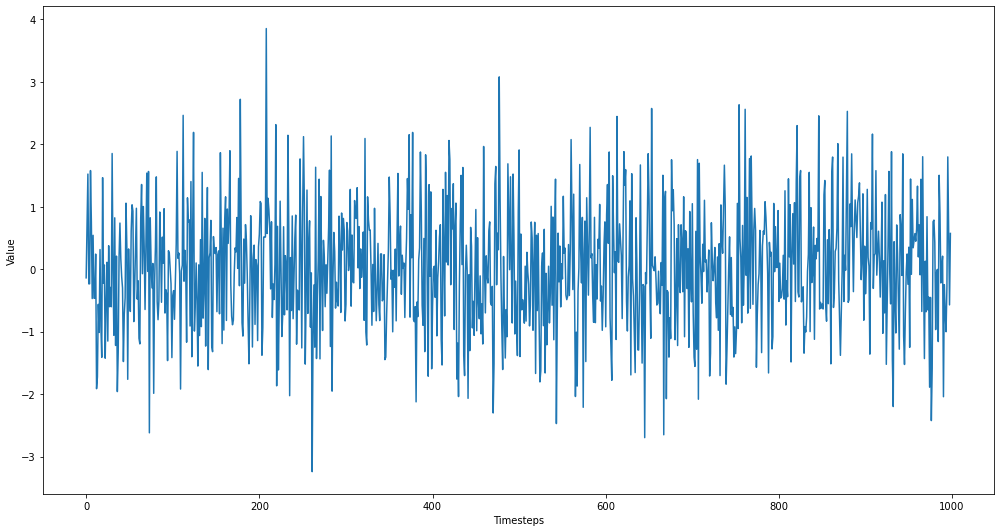

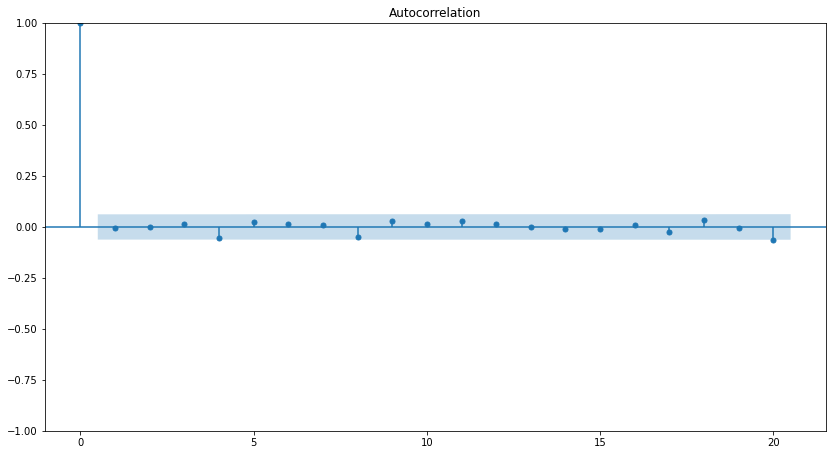

In [4]:
diff_random_walk = np.diff(random_walk, n=1)
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

fig1, ax1 = plt.subplots()
ax1.plot(diff_random_walk)
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Value")

plt.tight_layout()

plot_acf(diff_random_walk, lags=20)

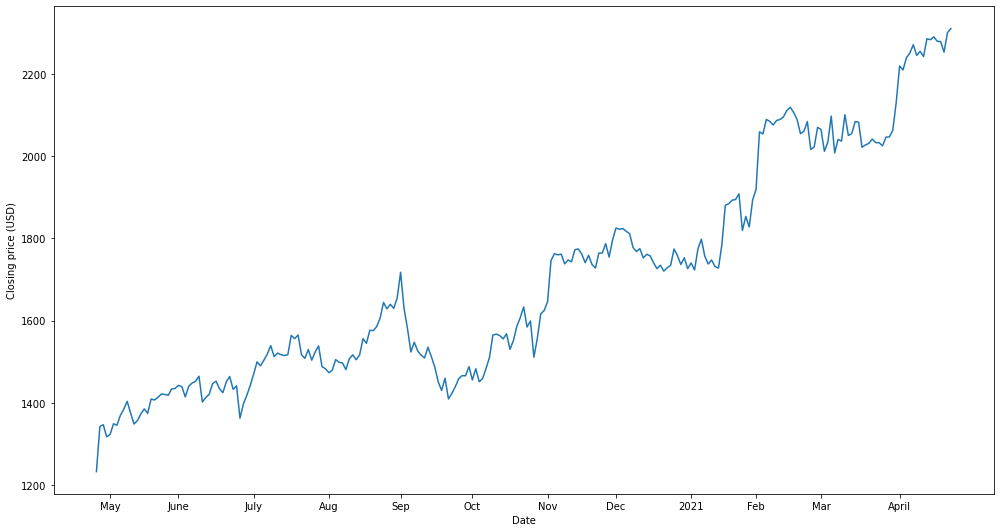

In [5]:
df = pd.read_csv("data/GOOGL.csv")

fig2, ax2 = plt.subplots()

ax2.plot(df.Date, df.Close)
ax2.set_xlabel("Date")
ax2.set_ylabel("Closing price (USD)")

plt.xticks(
    [4,24,46,68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov',
     'Dec', 2021, 'Feb', 'Mar', 'April']
)
fig.autofmt_xdate()
plt.tight_layout()

ADF Statistic: 0.3315854717408275
p-value: 0.9787480958746947
ADF Statistic: -5.2466808327774705
p-value: 7.054423105958886e-06


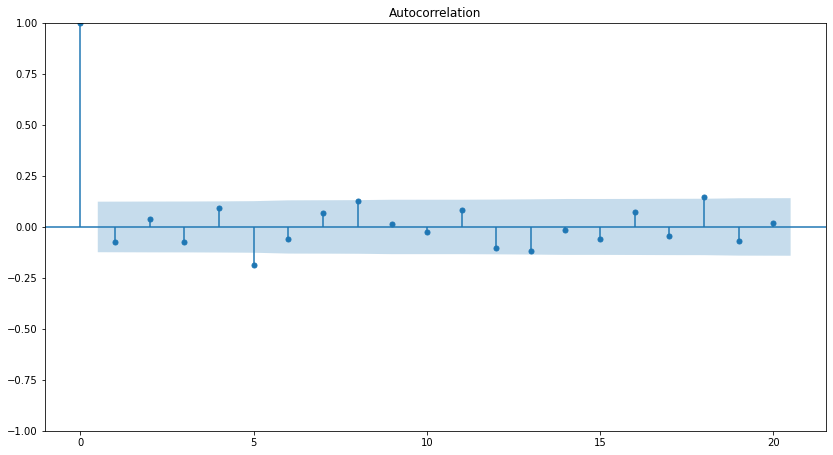

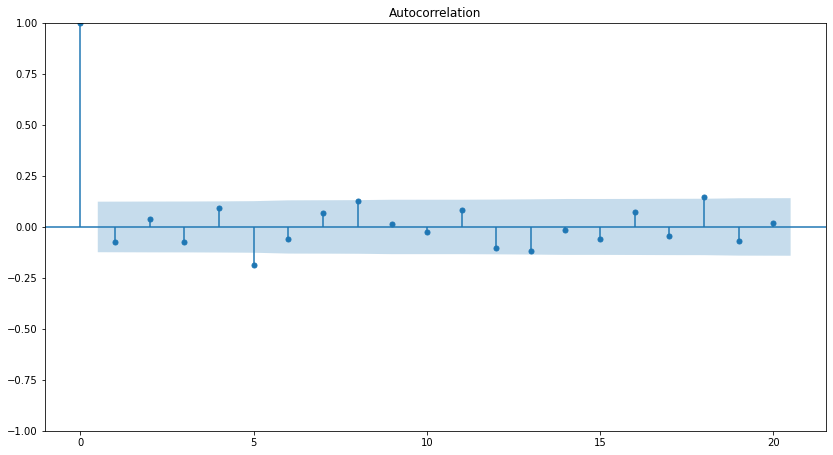

In [6]:
GOOGL_ADF_result = adfuller(df.Close)

print(f'ADF Statistic: {GOOGL_ADF_result[0]}')
print(f'p-value: {GOOGL_ADF_result[1]}')

diff_close = np.diff(df["Close"], n=1)

GOOGL_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {GOOGL_diff_ADF_result[0]}')
print(f'p-value: {GOOGL_diff_ADF_result[1]}')

plot_acf(diff_close, lags=20)

In [7]:
df = pd.DataFrame({"value": random_walk})

train = df[:800]
test = df[800:]

mean = np.mean(train.value)

pred_df = test.copy()
pred_df["pred_mean"] = mean

pred_df.head()

,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [8]:
last_value = train.iloc[-1].value
pred_df["pred_last_value"] = last_value

pred_df.head()

,value,pred_mean,pred_last_value
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


In [9]:
deltaX = 800 - 0
deltaY = last_value - 0

drift = deltaY / deltaX
print(drift)

x_vals = np.arange(800, 1000, 1)
pred_drift = drift * x_vals
pred_df["pred_drift"] = pred_drift
pred_df.head()

-0.008518684374069831


,value,pred_mean,pred_last_value,pred_drift
800,-5.876664,-3.677206,-6.814947,-6.814947
801,-6.392708,-3.677206,-6.814947,-6.823466
802,-6.296588,-3.677206,-6.814947,-6.831985
803,-6.758863,-3.677206,-6.814947,-6.840504
804,-7.193359,-3.677206,-6.814947,-6.849022


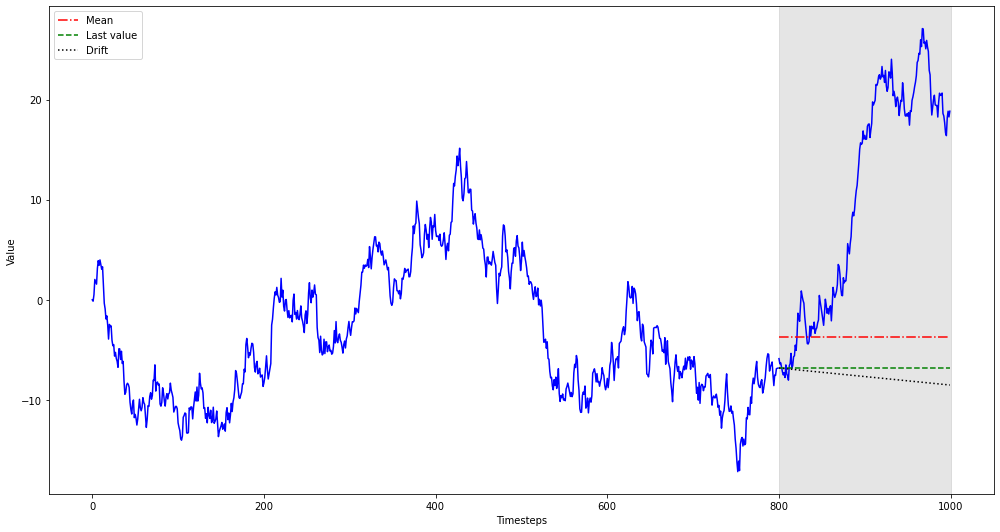

In [10]:
fig, ax = plt.subplots()

ax.plot(train.value, "b-")
ax.plot(pred_df.value, "b-")
ax.plot(pred_df.pred_mean, "r-.", label="Mean")
ax.plot(pred_df.pred_last_value, "g--", label="Last value")
ax.plot(pred_df.pred_drift, "k:", label="Drift")

ax.axvspan(800, 1000, color="#808080", alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")

plt.tight_layout()

326.50277395297474 425.1726033055617 465.54634215836614


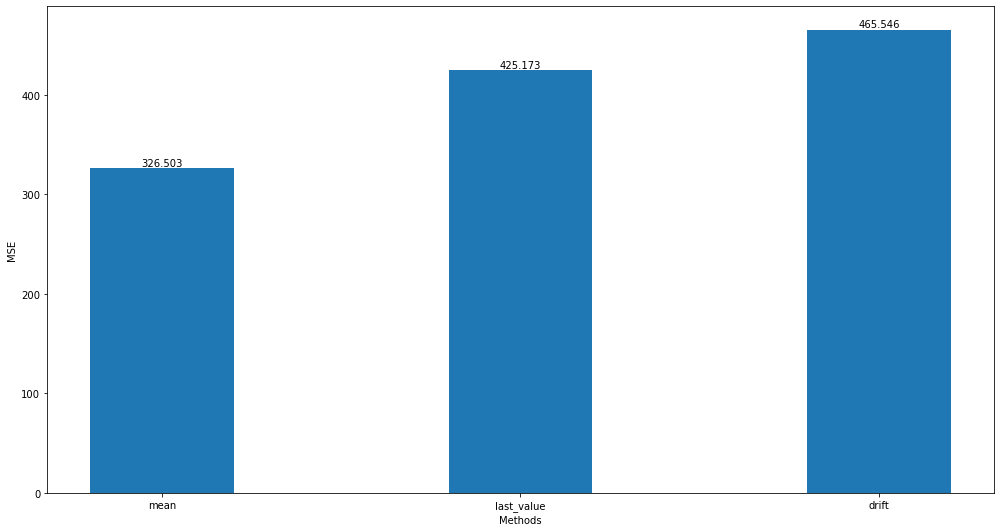

In [11]:
mse_mean = mean_squared_error(pred_df.value, pred_df.pred_mean)
mse_last = mean_squared_error(pred_df.value, pred_df.pred_last_value)
mse_drift = mean_squared_error(pred_df.value, pred_df.pred_drift)

print(mse_mean, mse_last, mse_drift)

fig, ax = plt.subplots()

ax.bar(["mean", "last_value", "drift"],
        [mse_mean, mse_last, mse_drift],
        width=0.4)
ax.set_xlabel("Methods")
ax.set_ylabel("MSE")
ax.bar_label(ax.containers[0])
plt.tight_layout()

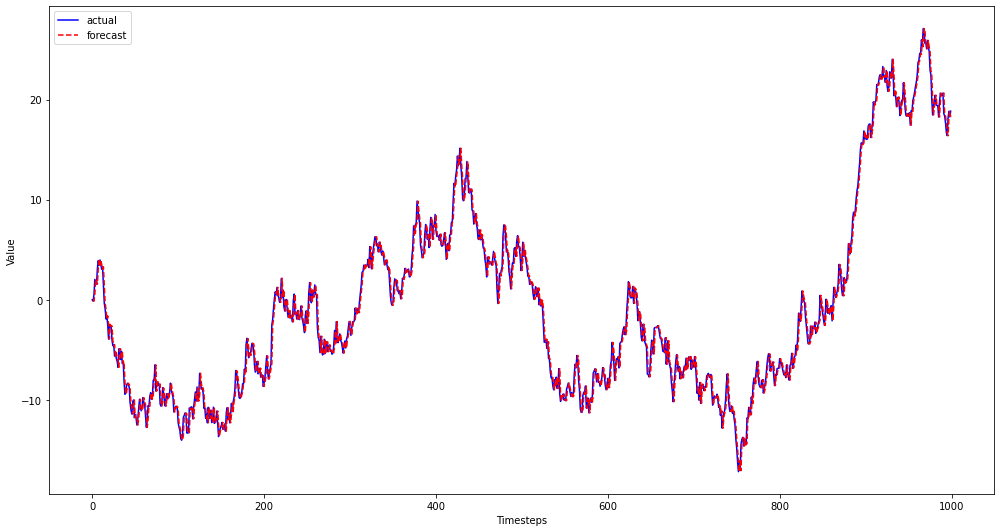

In [12]:
df_shift = df.shift(periods=1)

fig, ax = plt.subplots()
ax.plot(df, "b-", label="actual")
ax.plot(df_shift, "r--", label="forecast")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.legend(loc=2)

plt.tight_layout()

0.9256876651440581


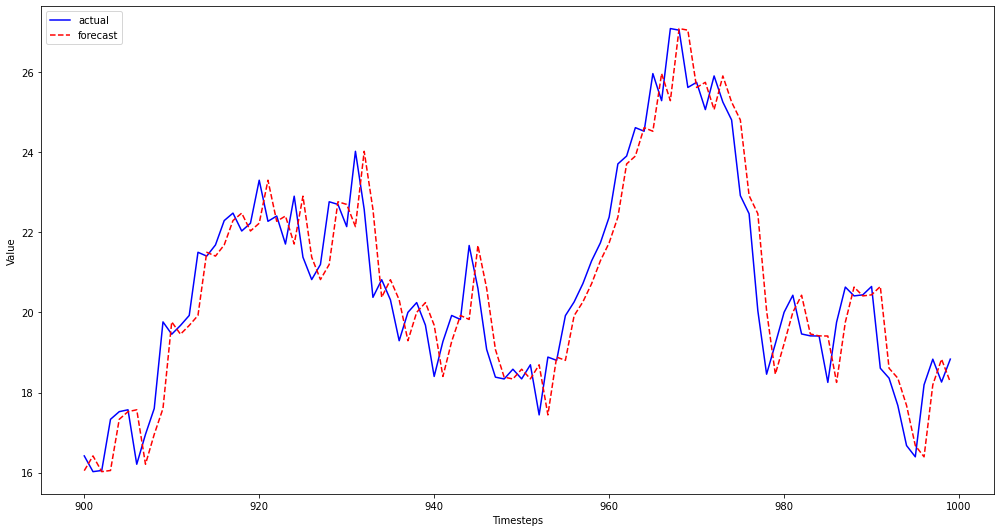

In [13]:
mse_one_step = mean_squared_error(pred_df.value, df_shift[800:])
print(mse_one_step)

fig, ax = plt.subplots()
ax.plot(df[-100:], "b-", label="actual")
ax.plot(df_shift[-100:], "r--", label="forecast")
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")
ax.legend(loc=2)

plt.tight_layout()

## 3.4 Exercises
### 3.4.1 Easy: simulate and forecast a random walk

500 TIMESTEP RANDOM WALK
PLOT RANDOM WALK


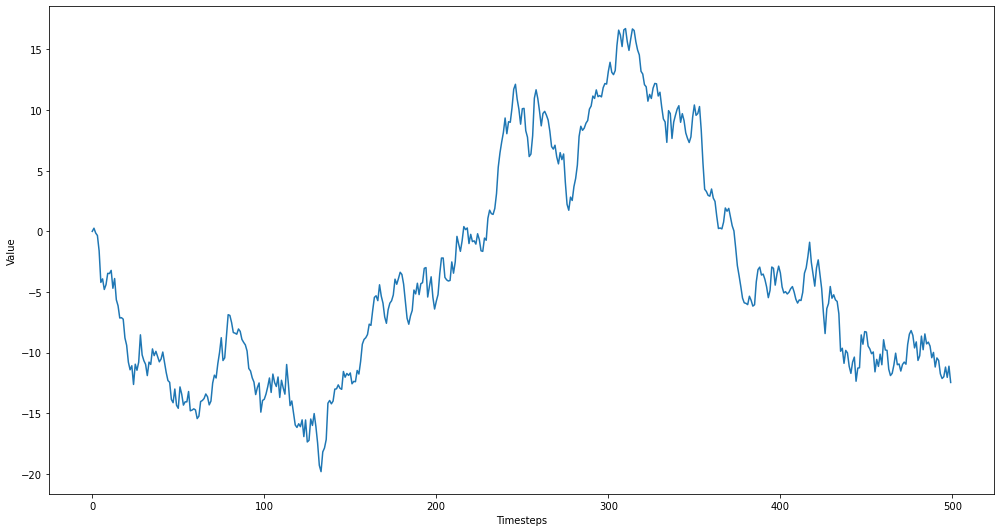

In [59]:
np.random.seed(45)

print("500 TIMESTEP RANDOM WALK")
steps = np.random.standard_normal(500)
steps[0] = 0

random_walk = np.cumsum(steps)

fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")

print("PLOT RANDOM WALK")
plt.tight_layout()

IS STATIONARY?
ADF Statistic: -1.076510701777411
      p-value: 0.7243477000080816
FIRST-ORDER DIFFERENCE
IS STATIONARY NOW?
ADF Statistic: -21.047720229663877
      p-value: 0.0


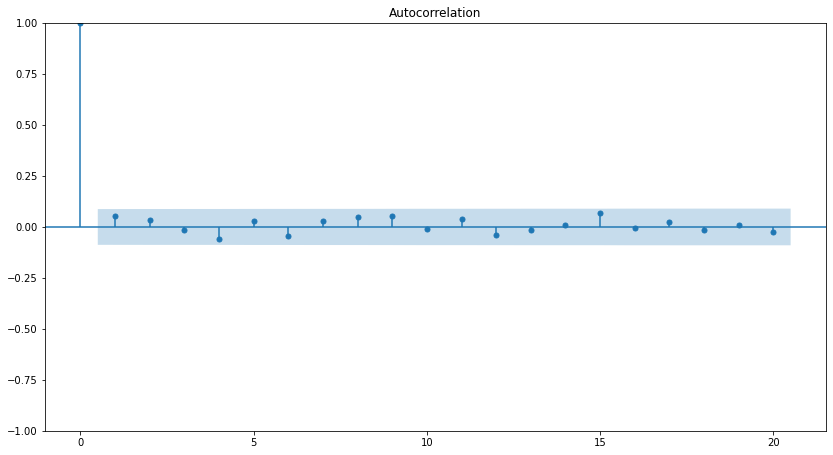

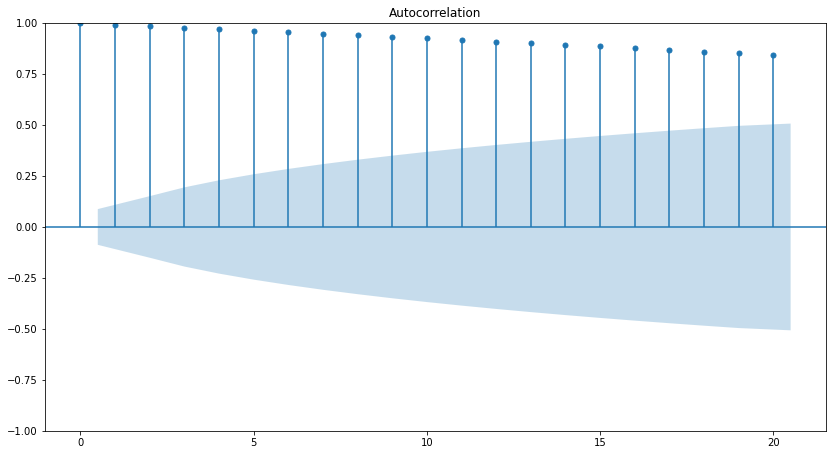

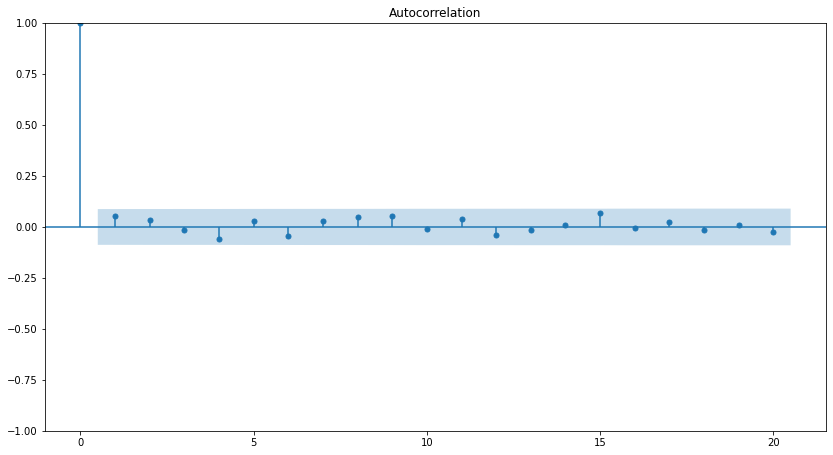

In [60]:
print("IS STATIONARY?")
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'      p-value: {ADF_result[1]}')

plot_acf(random_walk, lags=20)

print("FIRST-ORDER DIFFERENCE")
diff_random_walk = np.diff(random_walk, n=1)

print("IS STATIONARY NOW?")
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'      p-value: {ADF_result[1]}')

plot_acf(diff_random_walk, lags=20)

SPLIT INTO TRAIN AND TEST
NAIVE PREDICTIONS
PLOT NAIVE PREDICTIONS


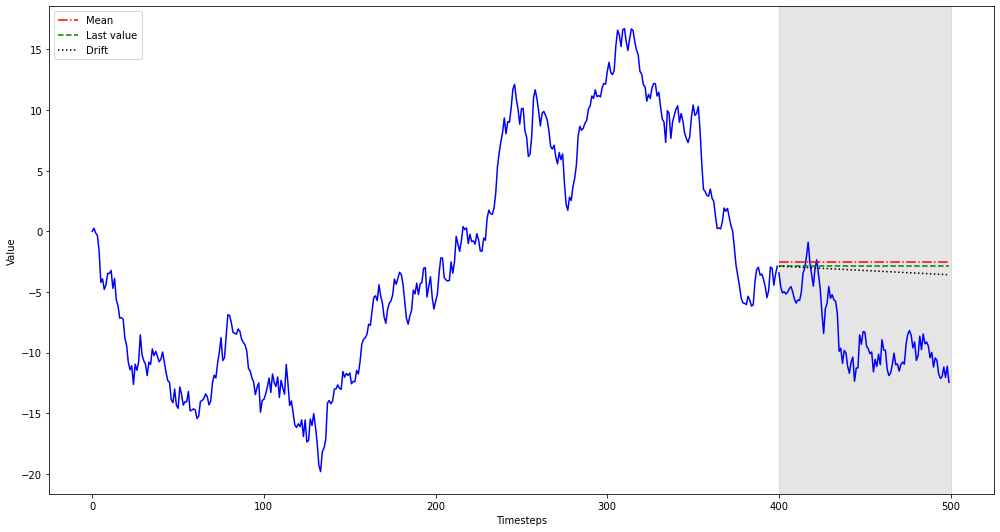

In [63]:
print("SPLIT INTO TRAIN AND TEST")
df = pd.DataFrame({"value": random_walk})
train = df[:400]
test = df[400:]

print("NAIVE PREDICTIONS")
mean = np.mean(train.value)

pred_df = test.copy()
pred_df["pred_mean"] = mean

last_value = train.iloc[-1].value
pred_df["pred_last_value"] = last_value

deltaX = 400 - 0
deltaY = last_value - 0
drift = deltaY / deltaX
x_vals = np.arange(400, 500, 1)
pred_drift = drift * x_vals
pred_df["pred_drift"] = pred_drift

print("PLOT NAIVE PREDICTIONS")
fig, ax = plt.subplots()

ax.plot(train.value, "b-")
ax.plot(pred_df.value, "b-")
ax.plot(pred_df.pred_mean, "r-.", label="Mean")
ax.plot(pred_df.pred_last_value, "g--", label="Last value")
ax.plot(pred_df.pred_drift, "k:", label="Drift")

ax.axvspan(400, 500, color="#808080", alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")

plt.tight_layout()

MSE - MEAN SQUARED ERROR
43.4070598414181 39.06554827799431 34.37108866239878


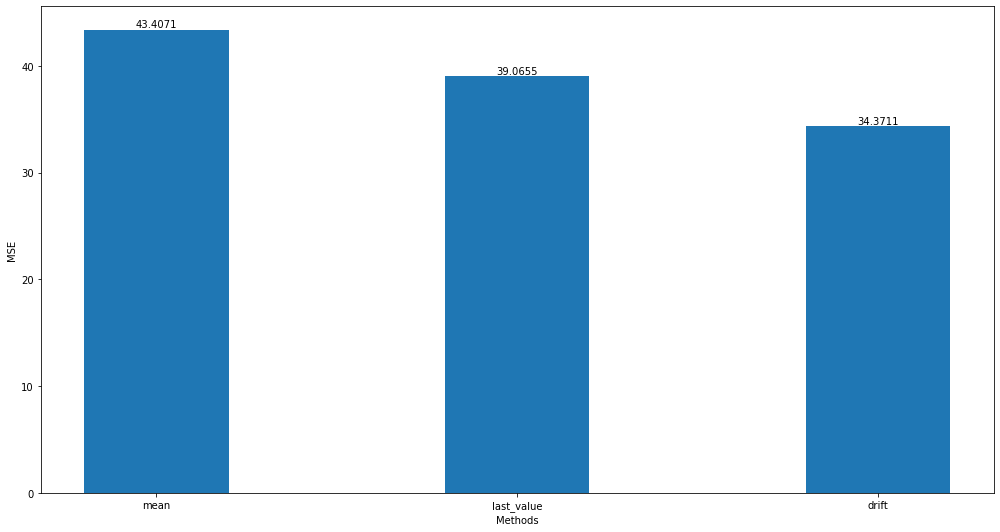

In [65]:
print("MSE - MEAN SQUARED ERROR")
mse_mean = mean_squared_error(pred_df.value, pred_df.pred_mean)
mse_last = mean_squared_error(pred_df.value, pred_df.pred_last_value)
mse_drift = mean_squared_error(pred_df.value, pred_df.pred_drift)

print(mse_mean, mse_last, mse_drift)

fig, ax = plt.subplots()

ax.bar(["mean", "last_value", "drift"],
        [mse_mean, mse_last, mse_drift],
        width=0.4)
ax.set_xlabel("Methods")
ax.set_ylabel("MSE")
ax.bar_label(ax.containers[0])
plt.tight_layout()

### 3.4.2 Forecast daily closing price of GOOGL

NAIVE PREDICTIONS
PLOT NAIVE PREDICTIONS


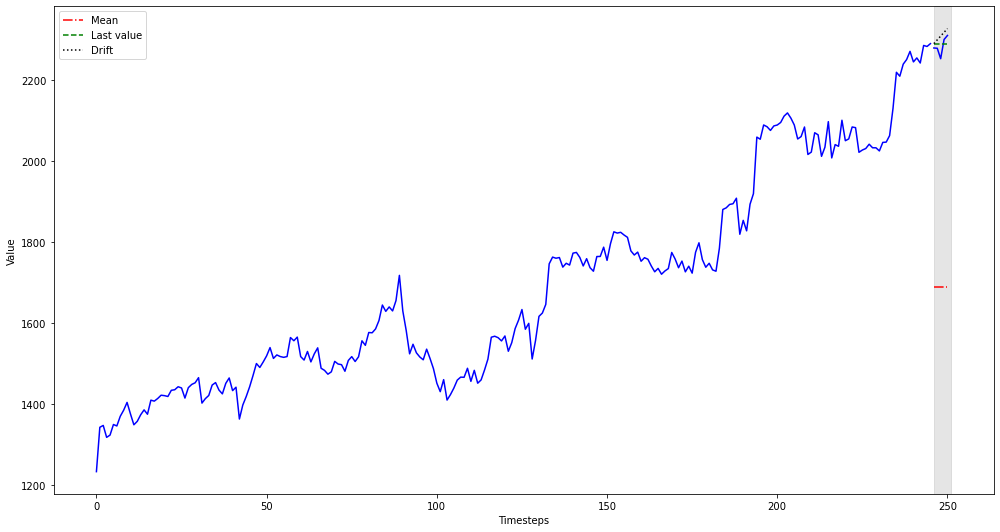

In [72]:
df = pd.read_csv("data/GOOGL.csv")

train = df[:246]
test = df[246:]

print("NAIVE PREDICTIONS")
mean = np.mean(train["Close"])

pred_df = test.copy()
pred_df["pred_mean"] = mean

last_value = train.iloc[-1]["Close"]
pred_df["pred_last_value"] = last_value

deltaX = 246 - 0
deltaY = last_value - 0
drift = deltaY / deltaX
x_vals = np.arange(246, 251, 1)
pred_drift = drift * x_vals
pred_df["pred_drift"] = pred_drift

print("PLOT NAIVE PREDICTIONS")
fig, ax = plt.subplots()

ax.plot(train["Close"], "b-")
ax.plot(pred_df["Close"], "b-")
ax.plot(pred_df.pred_mean, "r-.", label="Mean")
ax.plot(pred_df.pred_last_value, "g--", label="Last value")
ax.plot(pred_df.pred_drift, "k:", label="Drift")

ax.axvspan(246, 251, color="#808080", alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel("Timesteps")
ax.set_ylabel("Value")

plt.tight_layout()

MSE - MEAN SQUARED ERROR
353997.93359331216 428.5637028040038 854.198258410798


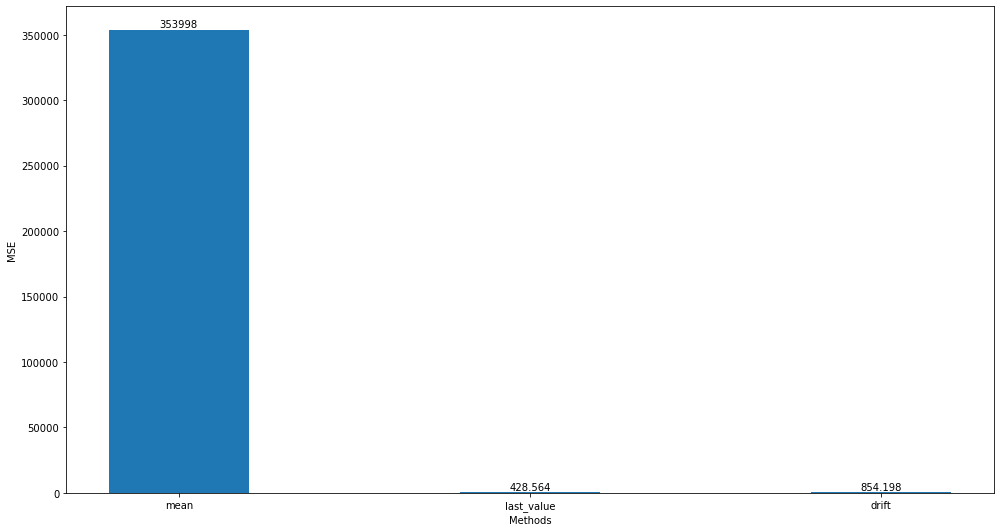

In [74]:
print("MSE - MEAN SQUARED ERROR")
mse_mean = mean_squared_error(pred_df["Close"], pred_df.pred_mean)
mse_last = mean_squared_error(pred_df["Close"], pred_df.pred_last_value)
mse_drift = mean_squared_error(pred_df["Close"], pred_df.pred_drift)

print(mse_mean, mse_last, mse_drift)

fig, ax = plt.subplots()

ax.bar(["mean", "last_value", "drift"],
        [mse_mean, mse_last, mse_drift],
        width=0.4)
ax.set_xlabel("Methods")
ax.set_ylabel("MSE")
ax.bar_label(ax.containers[0])
plt.tight_layout()